In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from cmcrameri import cm

In [28]:
hist_coal_gen = pd.read_csv("hist_coal_generation.csv")
hist_coal_gen["Gen_VRE_vPeakCoal"] = hist_coal_gen["Gen_Wind_vPeakCoal"]+hist_coal_gen["Gen_Solar_vPeakCoal"]
all_last_rows_coal = pd.read_csv("hist_coal_generation_lastrows.csv")
all_last_rows_coal["label"] = all_last_rows_coal["label"].fillna("None")
all_last_rows_coal["label"] = all_last_rows_coal["label"].replace("RE","VRE")
all_last_rows_coal["Gen_VRE_vPeakCoal"] = all_last_rows_coal["Gen_Wind_vPeakCoal"]+all_last_rows_coal["Gen_Solar_vPeakCoal"]
hist_coal_gen["Gen_Coal_PhaseOut_Minus"] = 1+hist_coal_gen["Gen_Coal_PhaseOut"]
all_last_rows_coal["Gen_Coal_PhaseOut_Minus"] = 1+all_last_rows_coal["Gen_Coal_PhaseOut"]
hist_coal_gen

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,Gen_Gas_vPeakCoal,Gen_Growth,Gen_Coal_PhaseOut,RE_vPeakCoal,year_since_peak_gen,year_since_peak_share,rate_decline_gen,rate_decline_share,Gen_VRE_vPeakCoal,Gen_Coal_PhaseOut_Minus
0,DEU,1990,45410.5,250.1,1927.0,45410.5,0.0,0.0,0.0,63.0,...,0.000000,1.000000,0.000000,0.000000,0,-1,NaN,-0.720604,0.000000,1.000000
1,DEU,1991,45832.5,252.5,1927.0,45832.5,0.0,0.0,0.0,64.0,...,-0.014030,0.964553,-0.007644,0.000484,1,0,0.764411,NaN,0.000484,0.992356
2,DEU,1992,46559.5,256.3,1927.0,46559.5,0.0,0.0,0.0,65.0,...,-0.024416,0.957554,-0.046349,0.000710,2,1,2.317443,2.015145,0.000710,0.953651
3,DEU,1993,47339.5,260.4,1927.0,47339.5,0.0,0.0,0.0,66.0,...,-0.018998,0.921526,-0.054154,0.001935,3,2,1.805141,0.646927,0.001935,0.945846
4,DEU,1994,47929.9,263.2,1927.0,47929.9,0.0,0.0,0.0,67.0,...,-0.000677,0.930299,-0.063701,0.004419,4,3,1.592535,0.716035,0.004419,0.936299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,MEX,2018,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,36.0,...,1.612733,2.468012,-0.115839,0.315217,6,15,1.930642,0.323644,0.315217,0.884161
987,MEX,2019,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,37.0,...,1.350621,2.035093,-0.094720,0.621429,7,16,1.353150,0.266568,0.621429,0.905280
988,MEX,2020,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,38.0,...,1.577640,2.266149,-0.426708,0.846894,8,17,5.333851,0.456384,0.846894,0.573292
989,MEX,2021,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,39.0,...,1.704658,2.621118,-0.587267,0.974845,9,18,6.525190,0.526958,0.974845,0.412733


In [33]:
len(hist_coal_gen["Country Code"].unique())

31

In [160]:
max_data = hist_coal_gen[['Country Code',"AR6_R10",'Coal_start_year','max_coal_year','max_perc_coal','max_perc_coal_year','max_cap_coal_year']].drop_duplicates()
max_data['peak_gen_since_start'] = max_data['max_perc_coal_year'] - max_data['Coal_start_year']
max_data.head()

,Country Code,AR6_R10,Coal_start_year,max_coal_year,max_perc_coal,max_perc_coal_year,max_cap_coal_year,peak_gen_since_start
0,DEU,R10EUROPE,1927.0,1990,0.574193,1991,2015,64.0
33,USA,R10NORTH_AM,1935.0,1999,0.537851,1993,2011,58.0
66,BEL,R10EUROPE,1949.0,1990,0.243136,1990,1999,41.0
99,BGR,R10EUROPE,1951.0,2011,0.551151,2011,2012,60.0
132,CZE,R10EUROPE,1951.0,2007,0.756219,1991,2007,40.0


(1985.0, 2024.0)

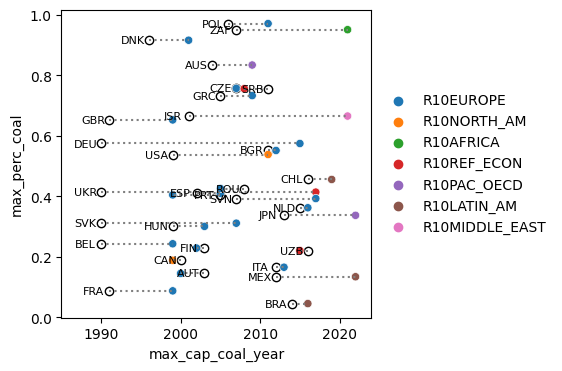

In [84]:
fig, axes = plt.subplots(figsize=(4,4))
for i in np.arange(len(max_data)):
    axes.hlines(y=max_data['max_perc_coal'].iloc[i],xmin=max_data['max_coal_year'].iloc[i],
                xmax=max_data['max_cap_coal_year'].iloc[i],color="gray",linestyle=":")
axes.scatter(x=max_data["max_coal_year"],y=max_data['max_perc_coal'],facecolor="white",edgecolor="black")
sns.scatterplot(x="max_cap_coal_year",y='max_perc_coal',hue="AR6_R10",data=max_data,ax=axes)    
    
x = list(max_data["max_coal_year"])
y = list(max_data["max_perc_coal"])
text = list(max_data["Country Code"])
for i in np.arange(len(x)):
    axes.text(x[i]-2,y[i]-0.01,text[i], horizontalalignment='center',fontsize=8)
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
axes.set_xlim([1985,2024])
axes.set_xlim([1985,2024])

In [29]:
complete_list = all_last_rows_coal[all_last_rows_coal["Gen_Coal_vPeak"]<0.05]
gas_red_countries = all_last_rows_coal[all_last_rows_coal["Gen_Gas_vPeakCoal"]<-0.05]
plot_data = hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=0]

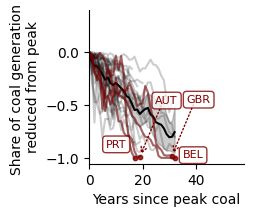

In [307]:
fig, axes = plt.subplots(figsize=(2,2))
sns.lineplot(x="year_since_peak_gen",y='Gen_Coal_PhaseOut',data=plot_data,
             color="black",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="year_since_peak_gen",y='Gen_Coal_PhaseOut',data=plot_data,
             color="black",zorder=1,legend=None)

count = 0
colors = ["maroon",cm.batlowS(2)]
for selected in [complete_list]:
    selected_color = colors[count]
    x = list(selected["year_since_peak_gen"])
    y = list(selected["Gen_Coal_PhaseOut"])
    text = list(selected["Country Code"])
    plot_data_special = plot_data[plot_data["Country Code"].isin(text)]
    sns.lineplot(x="year_since_peak_gen",y='Gen_Coal_PhaseOut',data=plot_data_special,
                 color=selected_color,units="Country Code",estimator=None,alpha=0.5,zorder=1,legend=None)
    for i in np.arange(len(x)):
        if text[i] in ["PRT"]:
            axes.text(x[i]-3,y[i]+0.1,text[i], horizontalalignment='right',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
        elif text[i] in ["BEL"]:
            axes.text(x[i]+3,y[i],text[i], horizontalalignment='left',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
        else:
            axes.annotate(text="", xy=(x[i],y[i]),
                     xytext=(x[i]+10,y[i]+0.6), 
                     arrowprops=dict(arrowstyle='->',color="maroon",lw=1,linestyle=":"))
            axes.text(x[i]+10,y[i]+0.5,text[i], horizontalalignment='center',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
    axes.scatter(x,y,color=selected_color,s=10,alpha=0.8)
    count = count+1
axes.set_ylabel("Share of coal generation \nreduced from peak")
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlim([0,58])
axes.set_ylim([-1.05,0.4])
axes.set_xlabel("Years since peak coal")
fig.savefig("figure_output/subs_electricity_coal_historical.png",dpi=600, bbox_inches='tight')

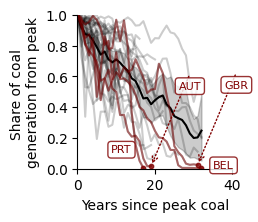

In [34]:
fig, axes = plt.subplots(figsize=(2,2))
sns.lineplot(x="year_since_peak_gen",y='Gen_Coal_PhaseOut_Minus',data=plot_data,
             color="black",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="year_since_peak_gen",y='Gen_Coal_PhaseOut_Minus',data=plot_data,
             color="black",zorder=1,legend=None)

count = 0
colors = ["maroon",cm.batlowS(2)]
for selected in [complete_list]:
    selected_color = colors[count]
    x = list(selected["year_since_peak_gen"])
    y = list(selected["Gen_Coal_PhaseOut_Minus"])
    text = list(selected["Country Code"])
    plot_data_special = plot_data[plot_data["Country Code"].isin(text)]
    sns.lineplot(x="year_since_peak_gen",y='Gen_Coal_PhaseOut_Minus',data=plot_data_special,
                 color=selected_color,units="Country Code",estimator=None,alpha=0.5,zorder=1,legend=None)
    for i in np.arange(len(x)):
        if text[i] in ["PRT"]:
            axes.text(x[i]-3,y[i]+0.1,text[i], horizontalalignment='right',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
        elif text[i] in ["BEL"]:
            axes.text(x[i]+3,y[i],text[i], horizontalalignment='left',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
        else:
            axes.annotate(text="", xy=(x[i],y[i]),
                     xytext=(x[i]+10,y[i]+0.6), 
                     arrowprops=dict(arrowstyle='->',color="maroon",lw=1,linestyle=":"))
            axes.text(x[i]+10,y[i]+0.5,text[i], horizontalalignment='center',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
    axes.scatter(x,y,color=selected_color,s=10,alpha=0.8)
    count = count+1
axes.set_ylabel("Share of coal \ngeneration from peak")
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlim([0,40])
axes.set_ylim([0,1])
axes.set_xlabel("Years since peak coal")
fig.savefig("figure_output/reduce_electricity_coal_historical.png",dpi=600, bbox_inches='tight')

In [2]:
from cmcrameri import cm

(0.0, 1.0)

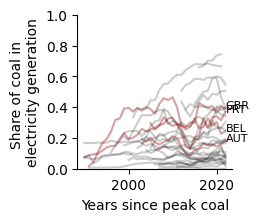

In [313]:
fig, axes = plt.subplots(figsize=(2,2))
complete_list = all_last_rows_coal[all_last_rows_coal["Gen_Coal_vPeak"]<0.05]
x = list(complete_list["Year"])
y = list(complete_list["Share_Gas_Gen"])
text = list(complete_list["Country Code"])
plot_data = hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=0]
plot_data_complete = plot_data[plot_data["Country Code"].isin(text)]
sns.lineplot(x="Year",y='Share_Gas_Gen',data=plot_data,
             color="black",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="Year",y='Share_Gas_Gen',data=plot_data_complete,
             color="red",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)

for i in np.arange(len(x)):
    axes.text(x[i],y[i],text[i], horizontalalignment='left',fontsize=8)
axes.set_ylabel("Share of coal in \nelectricity generation")
axes.set_xlabel("Years since peak coal")
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_xlim([0,58])
axes.set_ylim([0,1])

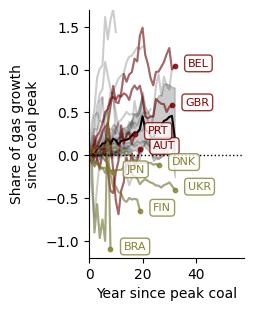

In [260]:
fig, axes = plt.subplots(figsize=(2,2*(2.9/1.8)))
plot_data = hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=0]
sns.lineplot(x="year_since_peak_gen",y='Gen_Gas_vPeakCoal',data=plot_data,
             color="black",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="year_since_peak_gen",y='Gen_Gas_vPeakCoal',data=plot_data,
             color="black",zorder=1,legend=None)
count = 0
colors = ["maroon",cm.batlowS(2)]
for selected in [complete_list,gas_red_countries]:
    selected_color = colors[count]
    x = list(selected["year_since_peak_gen"])
    y = list(selected["Gen_Gas_vPeakCoal"])
    text = list(selected["Country Code"])
    plot_data_special = plot_data[plot_data["Country Code"].isin(text)]
    sns.lineplot(x="year_since_peak_gen",y='Gen_Gas_vPeakCoal',data=plot_data_special,
                 color=selected_color,units="Country Code",estimator=None,alpha=0.5,zorder=1,legend=None)
    for i in np.arange(len(x)):
        axes.text(x[i]+5,y[i],text[i], horizontalalignment='left',fontsize=8,color=selected_color,
            bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
    axes.scatter(x,y,color=selected_color,s=10,alpha=0.8)
    count = 0+1

# manually add Austria
axes.text(x[i]+5,y[i],text[i], horizontalalignment='left',fontsize=8,color=selected_color,
            bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
axes.axhline(y = 0,linestyle=":",linewidth=1,color="black")
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim([-1.2,1.7])
axes.set_xlim([0,58])
axes.set_ylabel("Share of gas growth\nsince coal peak")
axes.set_xlabel("Year since peak coal")
fig.savefig("figure_output/subs_electricity_gas_historical.png",dpi=600, bbox_inches='tight')

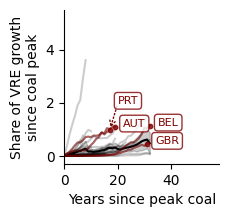

In [318]:
fig, axes = plt.subplots(figsize=(2,2))
plot_data = hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=0]
sns.lineplot(x="year_since_peak_gen",y='Gen_VRE_vPeakCoal',data=plot_data,
             color="black",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="year_since_peak_gen",y='Gen_VRE_vPeakCoal',data=plot_data,
             color="black",zorder=1,legend=None)
count = 0
for selected in [complete_list]:
    selected_color = colors[count]
    x = list(selected["year_since_peak_gen"])
    y = list(selected["Gen_VRE_vPeakCoal"])
    text = list(selected["Country Code"])
    plot_data_special = plot_data[plot_data["Country Code"].isin(text)]
    sns.lineplot(x="year_since_peak_gen",y='Gen_VRE_vPeakCoal',data=plot_data_special,
                 color=selected_color,units="Country Code",estimator=None,alpha=0.5,zorder=1,legend=None)
    for i in np.arange(len(x)):
        if text[i] == "PRT":
            axes.annotate(text="", xy=(x[i],y[i]),
                     xytext=(x[i]+3,y[i]+1), 
                     arrowprops=dict(arrowstyle='->',color="maroon",lw=1,linestyle=":"))
            axes.text(x[i]+3,y[i]+1,text[i], horizontalalignment='left',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
        else:
            axes.text(x[i]+3,y[i],text[i], horizontalalignment='left',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
    axes.scatter(x,y,color=selected_color,s=10,alpha=0.8)
    count = count+1

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlim([0,58])
axes.set_ylim([-0.3,5.5])
axes.set_ylabel("Share of VRE growth\nsince coal peak")
axes.set_xlabel("Years since peak coal")
fig.savefig("figure_output/subs_electricity_VRE_historical.png",dpi=600, bbox_inches='tight')

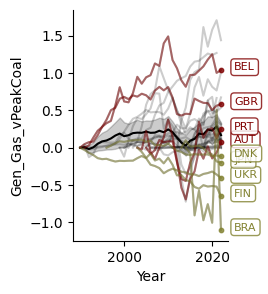

In [325]:
fig, axes = plt.subplots(figsize=(2,3))
plot_data = hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=0]
sns.lineplot(x="Year",y='Gen_Gas_vPeakCoal',data=plot_data,
             color="black",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="Year",y='Gen_Gas_vPeakCoal',data=plot_data,
             color="black",zorder=1,legend=None)
count = 0
for selected in [complete_list,gas_red_countries]:
    selected_color = colors[count]
    x = list(selected["Year"])
    y = list(selected["Gen_Gas_vPeakCoal"])
    text = list(selected["Country Code"])
    plot_data_special = plot_data[plot_data["Country Code"].isin(text)]
    sns.lineplot(x="Year",y='Gen_Gas_vPeakCoal',data=plot_data_special,
                 color=selected_color,units="Country Code",estimator=None,alpha=0.5,zorder=1,legend=None)
    for i in np.arange(len(x)):
        axes.text(x[i]+3,y[i],text[i], horizontalalignment='left',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
    axes.scatter(x,y,color=selected_color,s=10,alpha=0.8)
    count = count+1

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_xlim([0,58])
#axes.set_ylim([-0.3,5.5])
#axes.set_ylabel("Share of VRE growth\nsince coal peak")
#axes.set_xlabel("Years since peak coal")

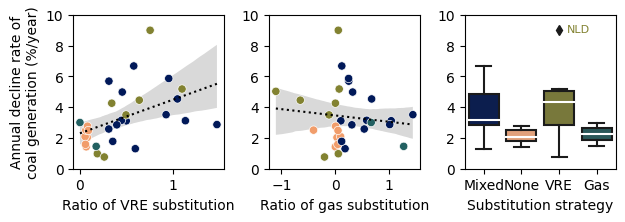

In [280]:
yvar = 'rate_decline_gen'
fig, axes = plt.subplots(1,3,figsize=(7,2))
fig.subplots_adjust(wspace=0.3)
batlow_map = [cm.batlowS(0),cm.batlowS(4),cm.batlowS(2),cm.batlowS(3)]
sns.regplot(x="Gen_VRE_vPeakCoal",y=yvar,data=all_last_rows_coal[all_last_rows_coal["Gen_VRE_vPeakCoal"]<3],color="black", scatter_kws={'s':2},ax=axes[0], line_kws={'linewidth':1.5,"linestyle":":"})
sns.scatterplot(x="Gen_VRE_vPeakCoal",y=yvar,data=all_last_rows_coal[all_last_rows_coal["Gen_VRE_vPeakCoal"]<3],hue="label",palette=batlow_map,ax=axes[0],legend=None)
sns.regplot(x="Gen_Gas_vPeakCoal",y=yvar,data=all_last_rows_coal,color="black", scatter_kws={'s':2},ax=axes[1], line_kws={'linewidth':1.5,"linestyle":":"})
sns.scatterplot(x="Gen_Gas_vPeakCoal",y=yvar,data=all_last_rows_coal,hue="label",palette=batlow_map,ax=axes[1],legend=None)
sns.boxplot(data=all_last_rows_coal, x="label", y=yvar, linewidth=1.5,palette=batlow_map,ax=axes[2],medianprops=dict(color="white"))
axes[0].set_ylabel("Annual decline rate of\ncoal generation (%/year)")
axes[1].set_ylabel(None)
axes[2].set_ylabel(None)
axes[0].set_ylim([0,10])
axes[1].set_ylim([0,10])
axes[2].set_ylim([0,10])
axes[0].set_xlabel("Ratio of VRE substitution")
axes[1].set_xlabel("Ratio of gas substitution")
axes[2].set_xlabel("Substitution strategy")
special_row = all_last_rows_coal[all_last_rows_coal[yvar]==all_last_rows_coal[yvar].max()]
axes[2].text(x=2.2,y=special_row[yvar].iloc[0]-0.1,s=special_row["Country Code"].iloc[0],fontsize=8,color=cm.batlowS(2))
fig.savefig("figure_output/subs_strategy.png",dpi=600, bbox_inches='tight')